In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

df = pd.read_csv("covid_related_disease_data.csv")

df.head()

,Patient_ID,Age,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,...,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Doses_Received,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status,BMI
0,1,69,Male,Hovedstaden,Obesity,2022-06-21,Delta,Mild,Moderate,Yes,...,No,NaN,Yes,NaN,1,2022-09-22,NaN,Healthcare,Never,27.7
1,2,38,Male,Sjælland,Asthma,2024-02-02,XBB.1.5,Mild,Moderate,No,...,No,NaN,No,NaN,0,NaN,NaN,Healthcare,Never,21.9
2,3,41,Female,Syddanmark,Hypertension,2023-05-28,Beta,Mild,High,Yes,...,No,NaN,Yes,Janssen,3,2024-05-14,NaN,Unemployed,Never,22.7
3,4,81,Female,Hovedstaden,Asthma,2023-08-13,Delta,Severe,High,No,...,Yes,2024-08-24,Yes,AstraZeneca,1,2024-10-31,NaN,Office Worker,Never,27.7
4,5,50,Female,Syddanmark,Cardiovascular,2023-03-10,Delta,Mild,High,No,...,No,NaN,Yes,NaN,2,2023-07-05,NaN,Student,Never,11.9


In [2]:
df.info()

df.isnull().sum().sort_values(ascending=False)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 26 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Patient_ID               3000 non-null   int64  
 1   Age                      3000 non-null   int64  
 2   Gender                   3000 non-null   object 
 3   Region                   3000 non-null   object 
 4   Preexisting_Condition    2531 non-null   object 
 5   Date_of_Infection        3000 non-null   object 
 6   COVID_Strain             3000 non-null   object 
 7   Symptoms                 3000 non-null   object 
 8   Severity                 3000 non-null   object 
 9   Hospitalized             3000 non-null   object 
 10  Hospital_Admission_Date  876 non-null    object 
 11  Hospital_Discharge_Date  876 non-null    object 
 12  ICU_Admission            3000 non-null   object 
 13  Ventilator_Support       3000 non-null   object 
 14  Recovered               

Long_COVID_Symptoms        2780
Date_of_Reinfection        2715
Hospital_Admission_Date    2124
Hospital_Discharge_Date    2124
Vaccine_Type               1809
Date_of_Last_Dose          1528
Date_of_Recovery           1492
Preexisting_Condition       469
Patient_ID                    0
Smoking_Status                0
Occupation                    0
Doses_Received                0
Vaccination_Status            0
Reinfection                   0
Ventilator_Support            0
Recovered                     0
Age                           0
ICU_Admission                 0
Hospitalized                  0
Severity                      0
Symptoms                      0
COVID_Strain                  0
Date_of_Infection             0
Region                        0
Gender                        0
BMI                           0
dtype: int64

In [3]:
df.describe()


,Patient_ID,Age,Doses_Received,BMI
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,1500.500000,53.944000,0.981667,25.096500
std,866.169729,20.872919,1.154025,4.898435
min,1.000000,18.000000,0.000000,10.200000
25%,750.750000,36.000000,0.000000,21.800000
50%,1500.500000,54.000000,0.000000,25.100000
75%,2250.250000,72.000000,2.000000,28.500000
max,3000.000000,89.000000,3.000000,44.600000


In [4]:
df.select_dtypes(include='object').describe()

,Gender,Region,Preexisting_Condition,Date_of_Infection,COVID_Strain,Symptoms,Severity,Hospitalized,Hospital_Admission_Date,Hospital_Discharge_Date,...,Recovered,Date_of_Recovery,Reinfection,Date_of_Reinfection,Vaccination_Status,Vaccine_Type,Date_of_Last_Dose,Long_COVID_Symptoms,Occupation,Smoking_Status
count,3000,3000,2531,3000,3000,3000,3000,3000,876,876,...,3000,1508,3000,285,3000,1191,1472,220,3000,3000
unique,2,5,5,720,5,3,4,2,555,400,...,2,685,2,194,2,4,807,4,6,3
top,Female,Midtjylland,Cardiovascular,2023-05-02,Beta,Severe,Moderate,No,2025-01-30,2025-05-20,...,Yes,2024-08-25,No,2025-01-29,No,Pfizer,2023-11-22,Fatigue,Student,Never
freq,1527,628,533,11,622,1012,791,2124,5,10,...,1508,8,2715,4,1528,311,6,62,533,1019


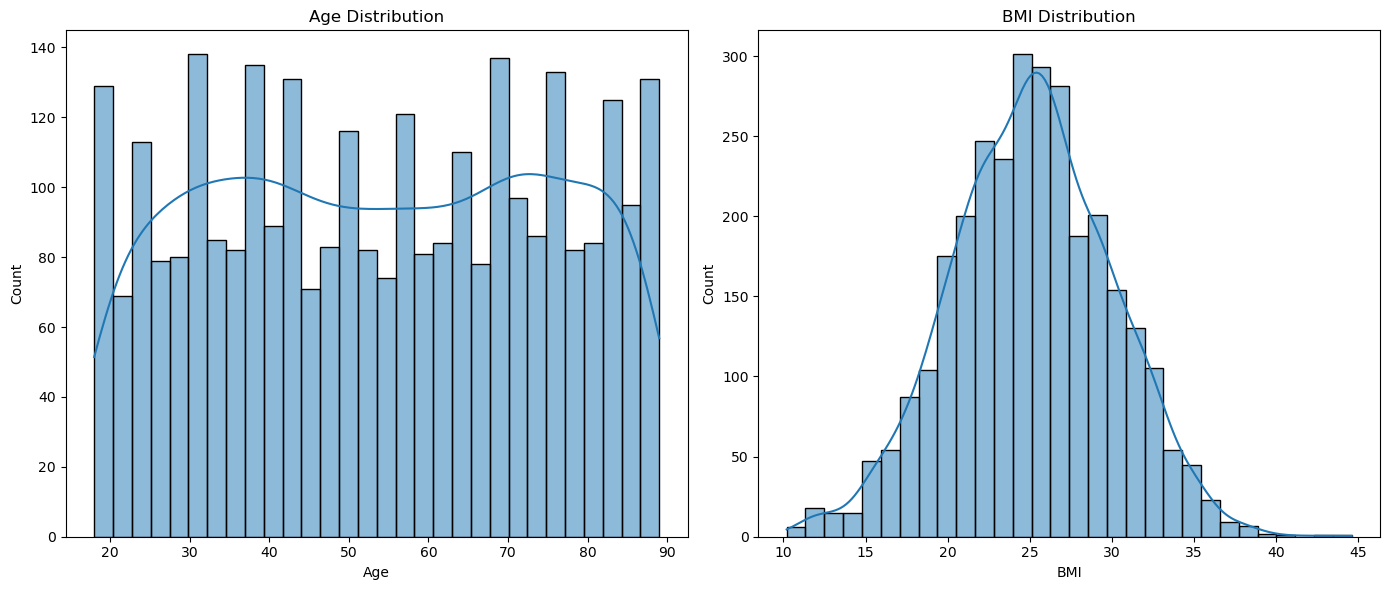

In [5]:
plt.figure(figsize=(14, 6))

plt.subplot(1, 2, 1)
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')

plt.subplot(1, 2, 2)
sns.histplot(df['BMI'], kde=True, bins=30)
plt.title('BMI Distribution')

plt.tight_layout()
plt.show()

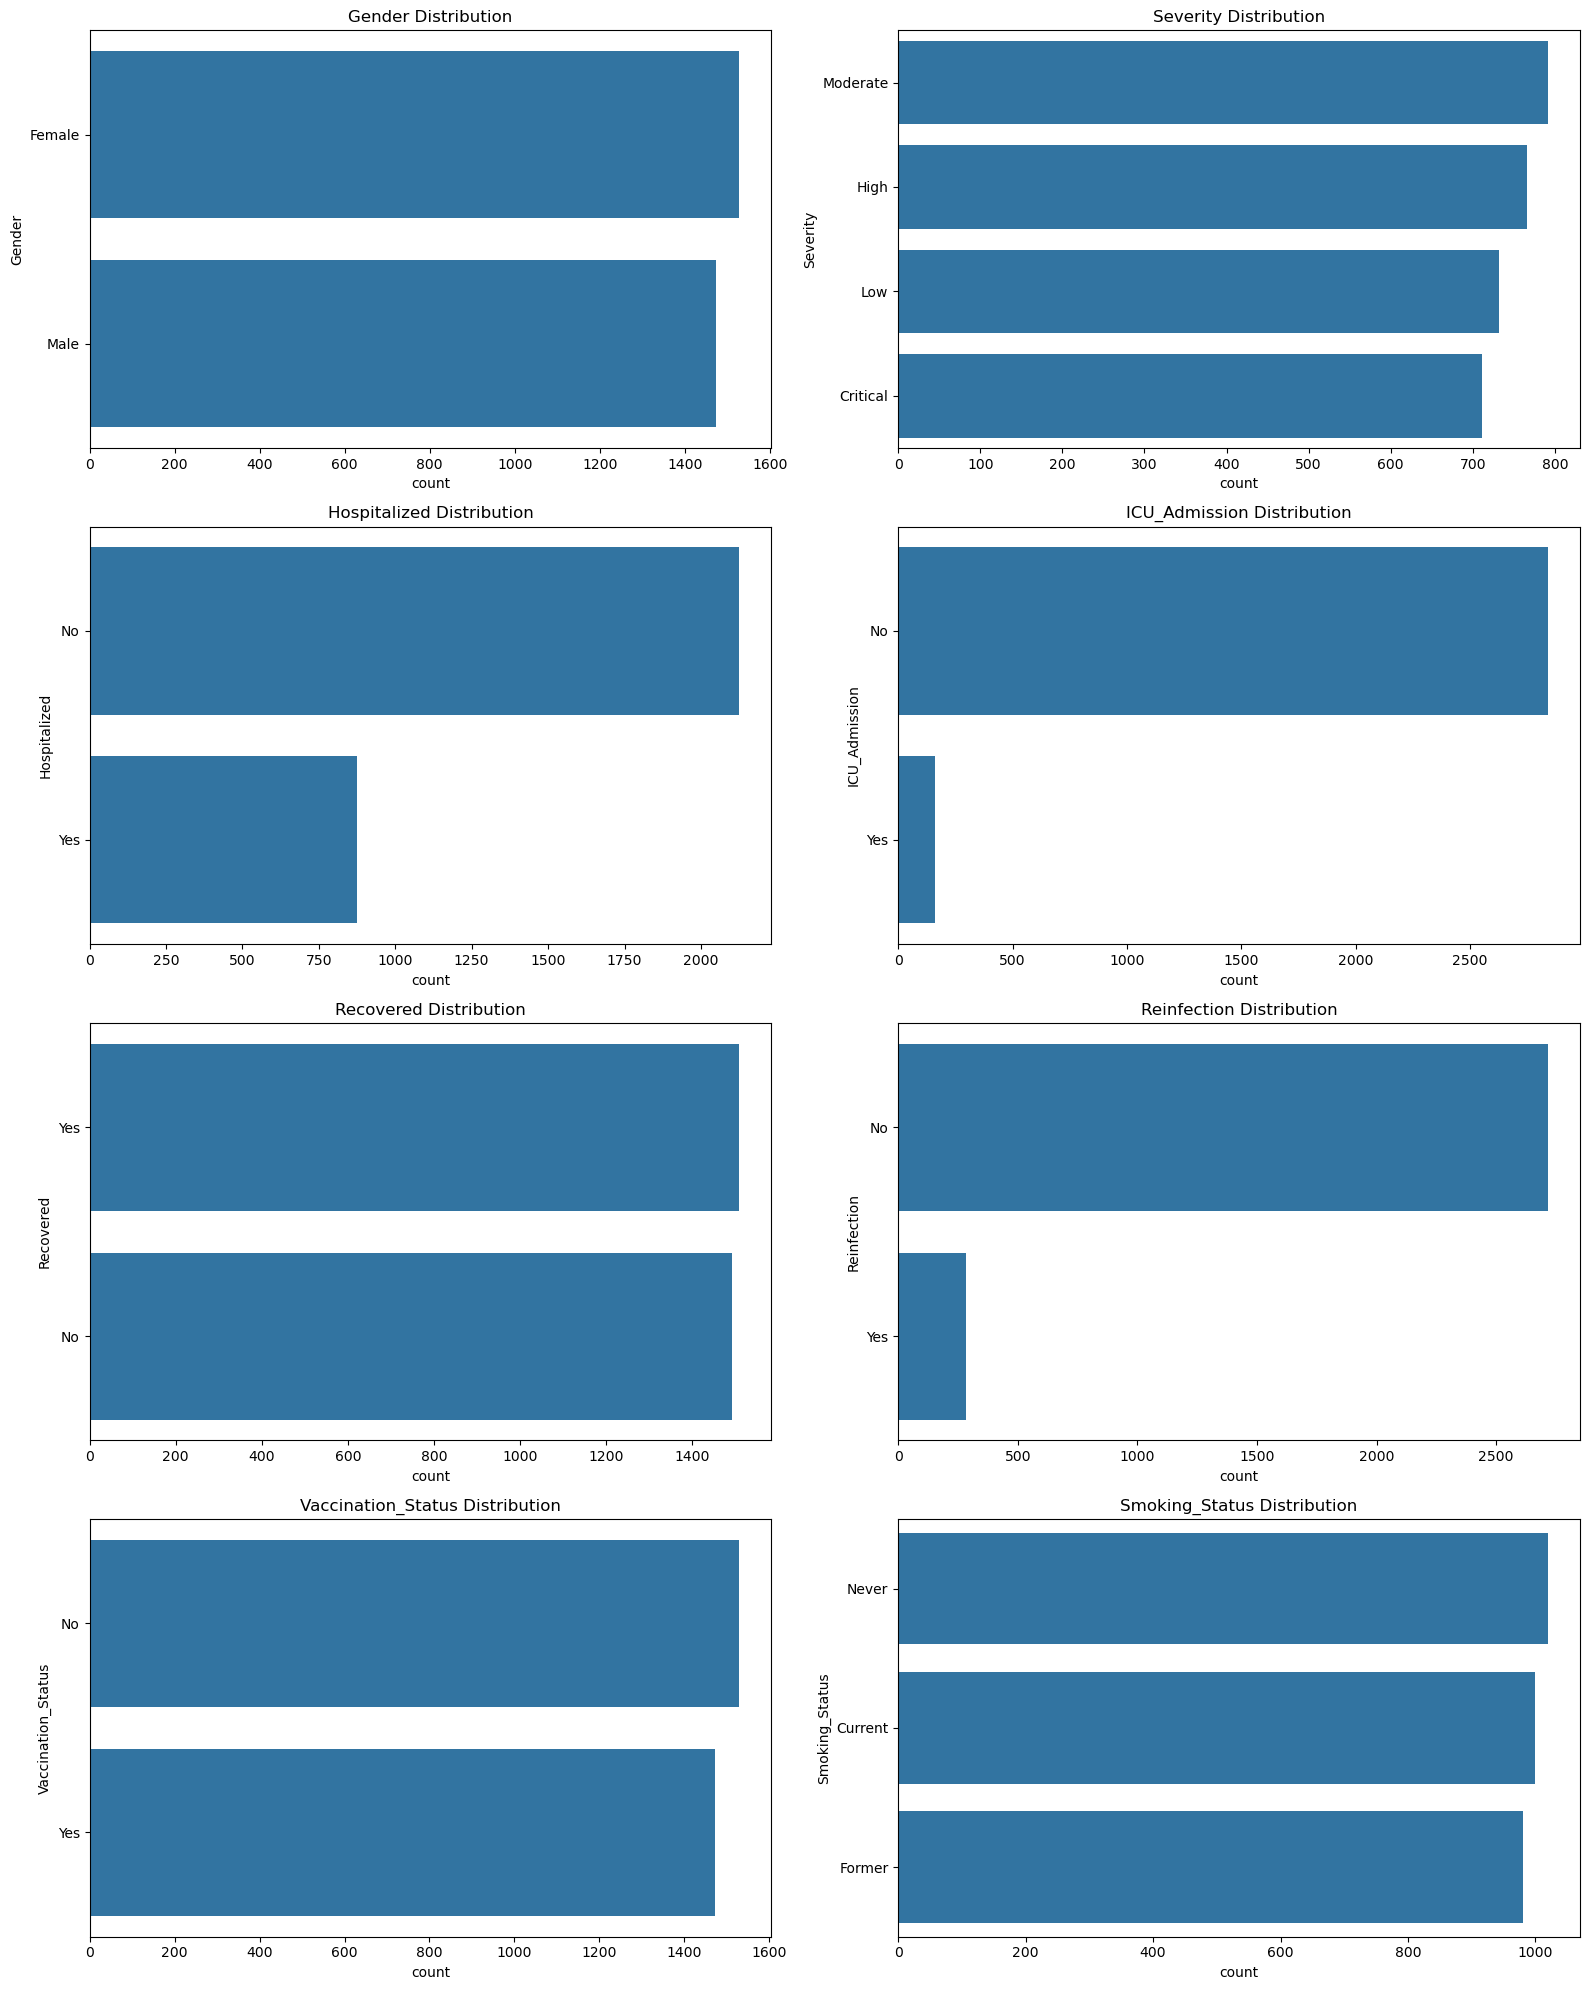

In [6]:
categorical_cols = ['Gender', 'Severity', 'Hospitalized', 'ICU_Admission', 
                    'Recovered', 'Reinfection', 'Vaccination_Status', 'Smoking_Status']

plt.figure(figsize=(16, 20))
for i, col in enumerate(categorical_cols):
    plt.subplot(4, 2, i+1)
    sns.countplot(y=df[col], order=df[col].value_counts().index)
    plt.title(f'{col} Distribution')
    plt.tight_layout()
plt.show()

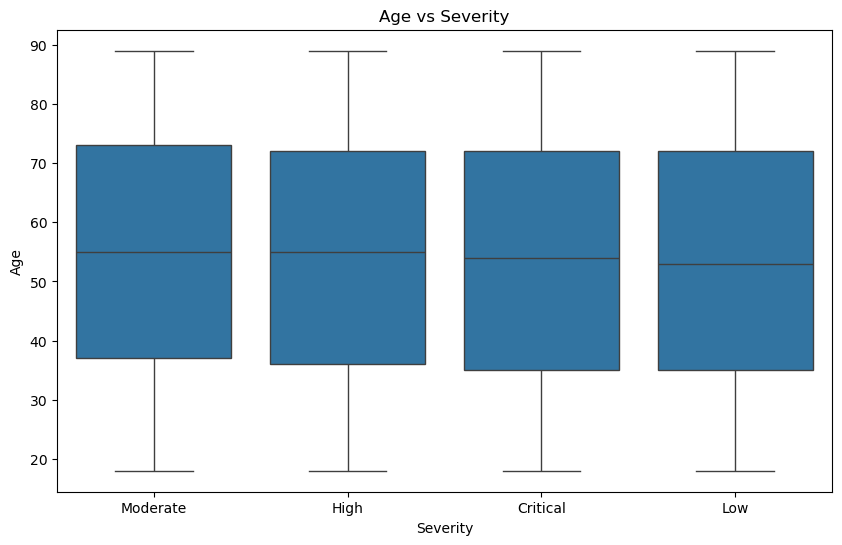

In [7]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='Age', data=df)
plt.title('Age vs Severity')
plt.show()

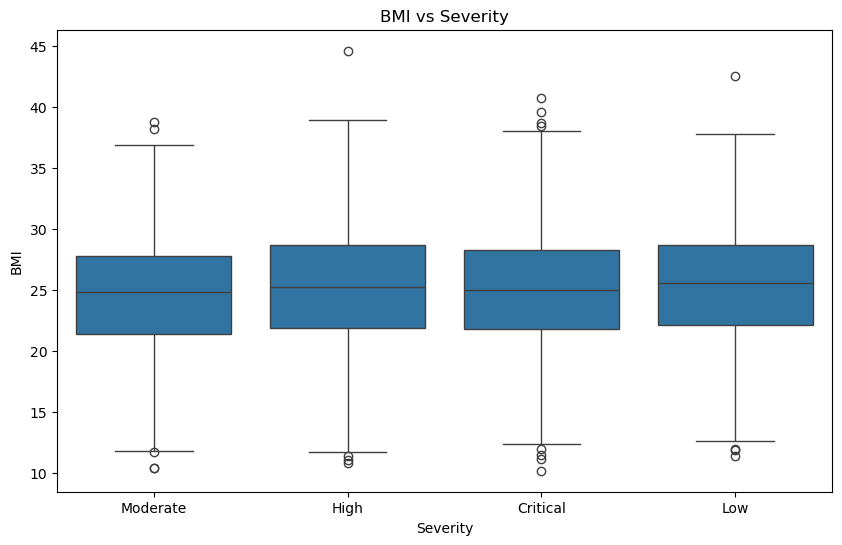

In [8]:
plt.figure(figsize=(10, 6))
sns.boxplot(x='Severity', y='BMI', data=df)
plt.title('BMI vs Severity')
plt.show()

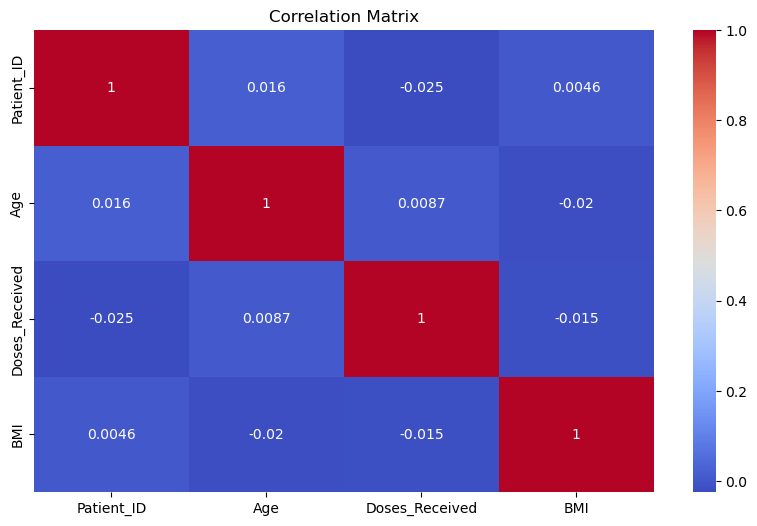

In [9]:
numerical_df = df.select_dtypes(include=['int64', 'float64'])

plt.figure(figsize=(10, 6))
sns.heatmap(numerical_df.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

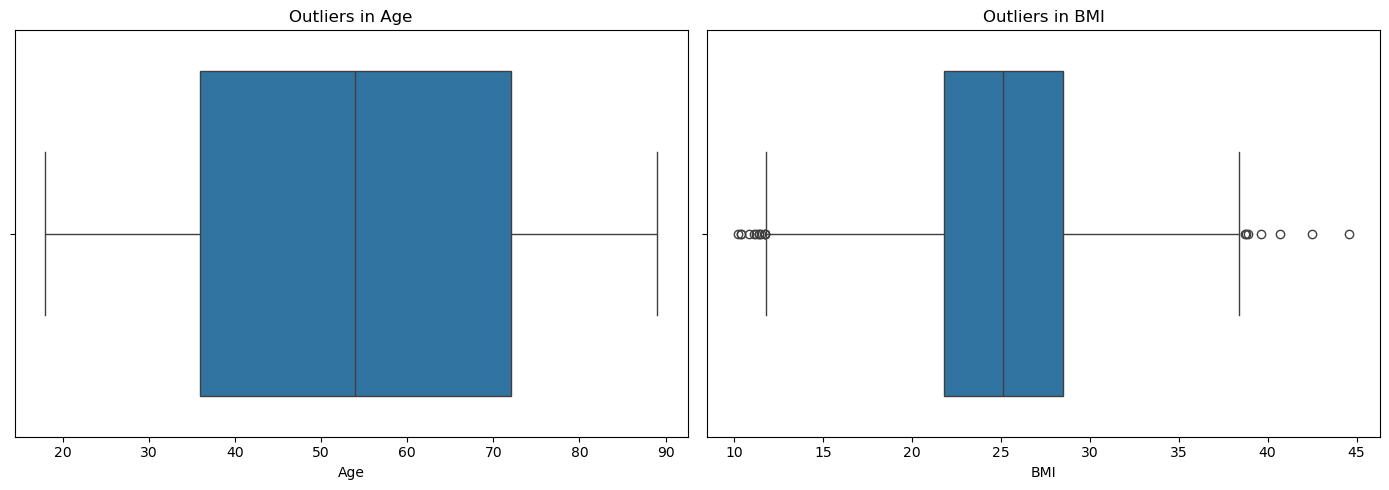

In [10]:
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
sns.boxplot(data=df, x='Age')
plt.title('Outliers in Age')

plt.subplot(1, 2, 2)
sns.boxplot(data=df, x='BMI')
plt.title('Outliers in BMI')

plt.tight_layout()
plt.show()


In [ ]:
STEP-BY-STEP ML PIPELINE

In [18]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [19]:
df = pd.read_csv("covid_related_disease_data.csv")

df = df.drop(columns=['Date_of_Reinfection', 'Hospital_Admission_Date', 'Hospital_Discharge_Date', 
                      'Date_of_Last_Dose', 'Date_of_Recovery'])

df = df.drop(columns=['Patient_ID'])

In [20]:
df['BMI'] = df['BMI'].fillna(df['BMI'].median())

categorical_cols = df.select_dtypes(include='object').columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

In [21]:
le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [22]:
X = df.drop('Severity', axis=1)
y = df['Severity']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [23]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [24]:
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

Accuracy: 0.25666666666666665

Classification Report:
               precision    recall  f1-score   support

           0       0.20      0.22      0.21       125
           1       0.28      0.19      0.23       175
           2       0.25      0.27      0.26       141
           3       0.29      0.34      0.31       159

    accuracy                           0.26       600
   macro avg       0.25      0.26      0.25       600
weighted avg       0.26      0.26      0.25       600



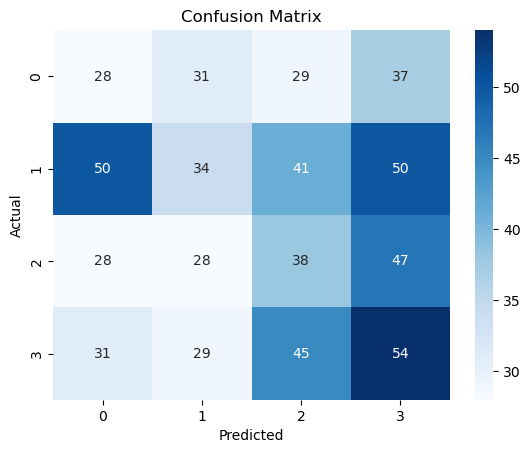

In [25]:
y_pred = model.predict(X_test)

print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()